In [1]:
pip install imbalanced-learn


In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, r2_score, precision_score, recall_score, f1_score
from imblearn.over_sampling import SMOTE

In [3]:
df = pd.read_csv('C:/Users/ADMIN/Downloads/Bank Customer Churn Prediction/Churn_Modelling.csv', header=0)


In [4]:
print("\nDataset Head:")
print(df.head())
print("\nDataset Tail:")
print(df.tail())
print("\nDataset Shape:", df.shape)
print("\nDataset Size:", df.size)
print("\nDataset Description:")
print(df.describe())
print("\nDataset Info:")
df.info()


Dataset Head:
   RowNumber  CustomerId   Surname  CreditScore Geography  Gender  Age  \
0          1    15634602  Hargrave          619    France  Female   42   
1          2    15647311      Hill          608     Spain  Female   41   
2          3    15619304      Onio          502    France  Female   42   
3          4    15701354      Boni          699    France  Female   39   
4          5    15737888  Mitchell          850     Spain  Female   43   

   Tenure    Balance  NumOfProducts  HasCrCard  IsActiveMember  \
0       2       0.00              1          1               1   
1       1   83807.86              1          0               1   
2       8  159660.80              3          1               0   
3       1       0.00              2          0               0   
4       2  125510.82              1          1               1   

   EstimatedSalary  Exited  
0        101348.88       1  
1        112542.58       0  
2        113931.57       1  
3         93826.63       0 

In [5]:
print("\nMissing Values:\n", df.isnull().sum())


Missing Values:
 RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64


In [6]:
print("\nUnique Values:")
print("Geography:", df["Geography"].unique())
print("Gender:", df["Gender"].unique())
print("NumOfProducts:", df["NumOfProducts"].unique())
print("HasCrCard:", df["HasCrCard"].unique())
print("IsActiveMember:", df["IsActiveMember"].unique())
print("Exited:", df["Exited"].unique())



Unique Values:
Geography: ['France' 'Spain' 'Germany']
Gender: ['Female' 'Male']
NumOfProducts: [1 3 2 4]
HasCrCard: [1 0]
IsActiveMember: [1 0]
Exited: [1 0]


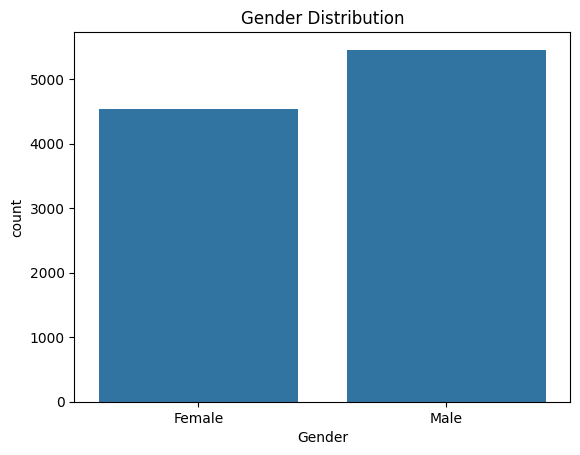

In [7]:
sns.countplot(x='Gender', data=df)
plt.title('Gender Distribution')
plt.show()

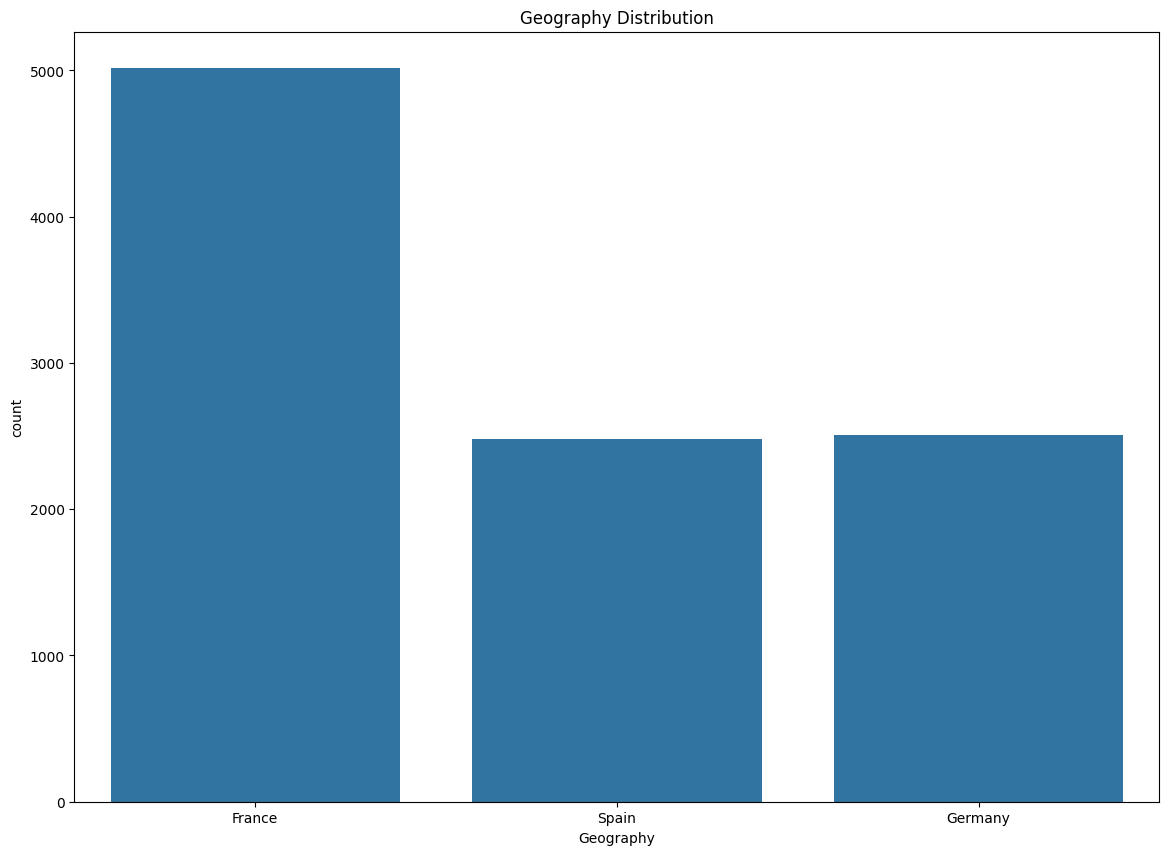

In [8]:
plt.figure(figsize=(14, 10))
sns.countplot(x='Geography', data=df)
plt.title('Geography Distribution')
plt.show()

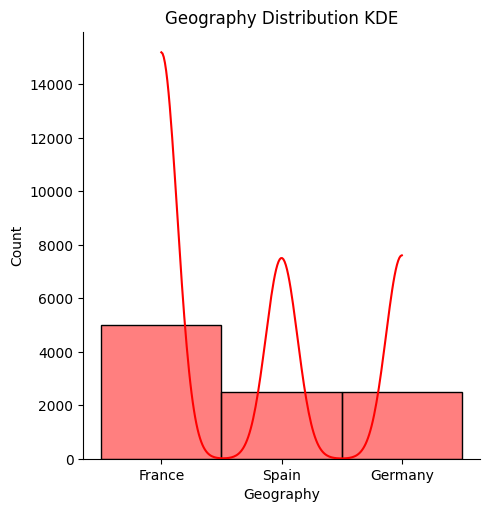

In [9]:
sns.displot(df.Geography, kde=True, color="red")
plt.title("Geography Distribution KDE")
plt.show()

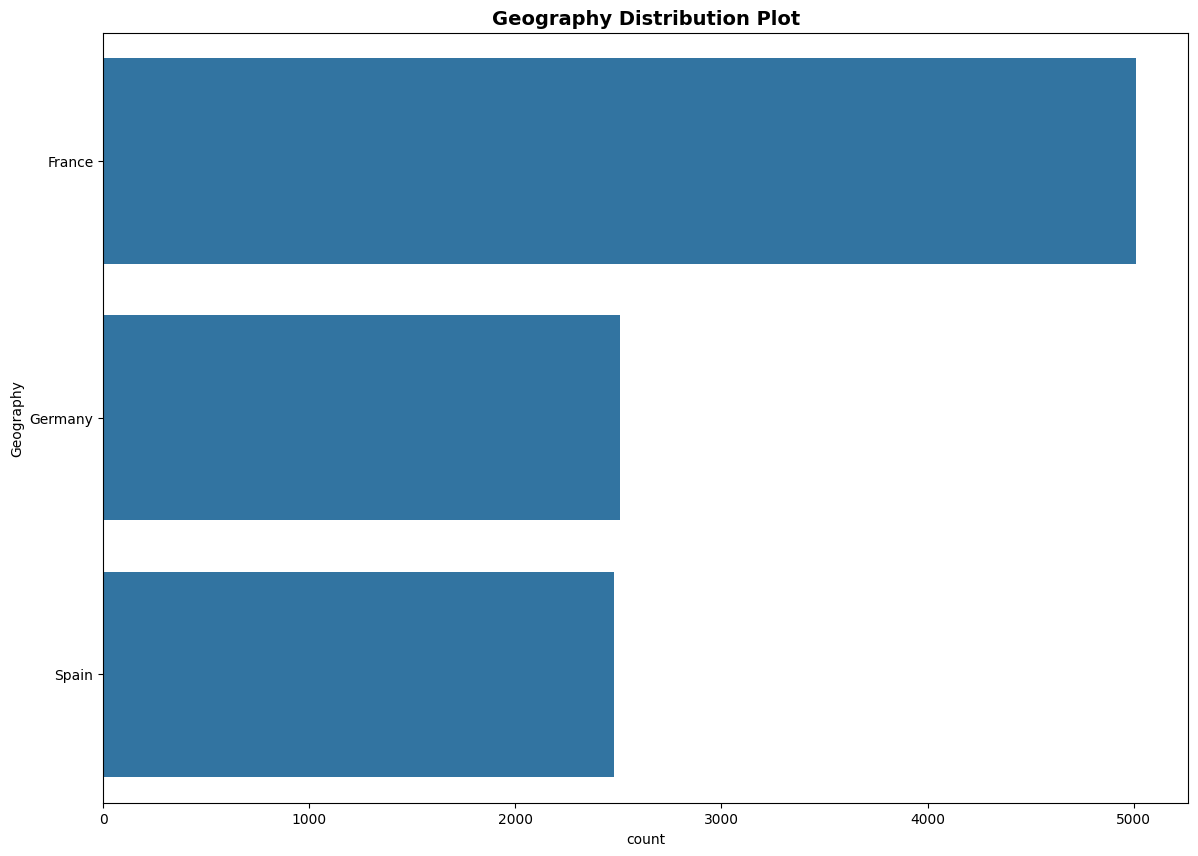

In [10]:
plt.figure(figsize=(14, 10))
count1 = df.Geography.value_counts()
sns.barplot(x=count1, y=count1.index, orient='h')
plt.title('Geography Distribution Plot', fontsize=14, fontweight="bold")
plt.show()

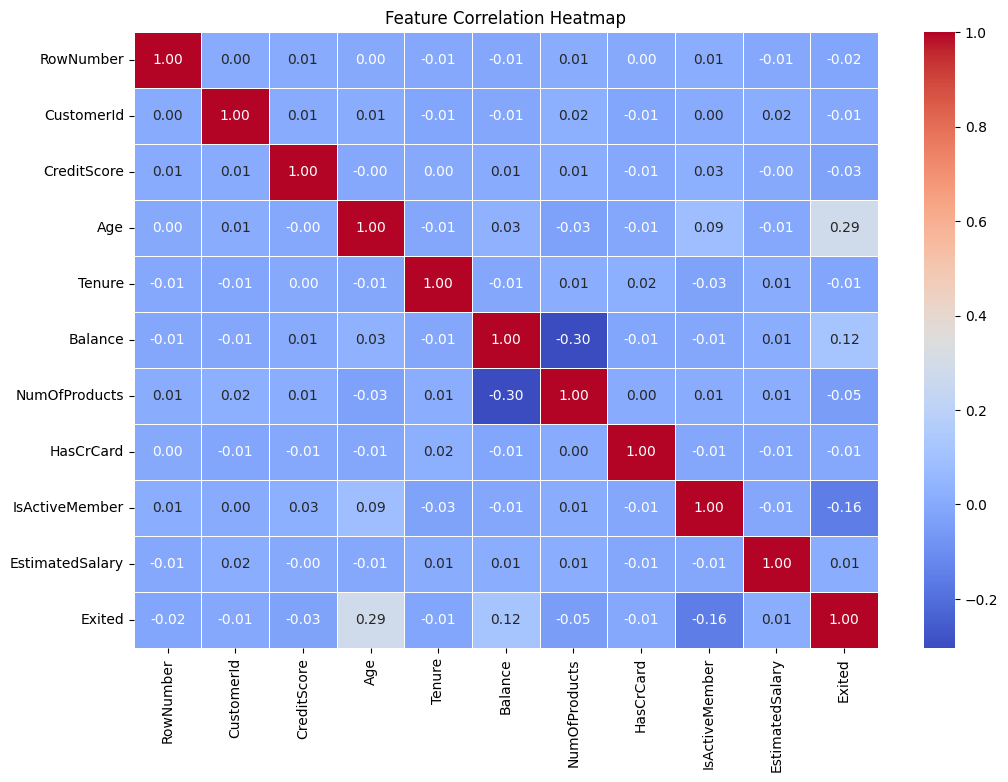

In [11]:
numeric_df = df.select_dtypes(include=[np.number])
plt.figure(figsize=(12, 8))
sns.heatmap(numeric_df.corr(), cmap='coolwarm', annot=True, fmt=".2f", linewidths=0.5)
plt.title("Feature Correlation Heatmap")
plt.show()

In [12]:
df.drop(labels=["RowNumber", "CustomerId", "Surname"], axis=1, inplace=True)

In [13]:
df = pd.get_dummies(df, drop_first=True)


In [14]:
X = df.drop("Exited", axis=1)
y = df["Exited"]


In [15]:
print("\nClass Distribution Before SMOTE:")
print(y.value_counts())
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)
print("\nClass Distribution After SMOTE:")
print(pd.Series(y_resampled).value_counts())


Class Distribution Before SMOTE:
Exited
0    7963
1    2037
Name: count, dtype: int64

Class Distribution After SMOTE:
Exited
1    7963
0    7963
Name: count, dtype: int64


In [16]:
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

In [17]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [18]:
lr_model = LogisticRegression()
lr_model.fit(X_train, y_train)
lr_predictions = lr_model.predict(X_test)

In [19]:
print("\nLogistic Regression Model:")
print(confusion_matrix(y_test, lr_predictions))
print(classification_report(y_test, lr_predictions))
print("Accuracy: ", accuracy_score(y_test, lr_predictions))


Logistic Regression Model:
[[1267  366]
 [ 365 1188]]
              precision    recall  f1-score   support

           0       0.78      0.78      0.78      1633
           1       0.76      0.76      0.76      1553

    accuracy                           0.77      3186
   macro avg       0.77      0.77      0.77      3186
weighted avg       0.77      0.77      0.77      3186

Accuracy:  0.7705586942875079


In [20]:
rf_params = {'n_estimators': [100, 500, 1000], 'max_depth': [5, 10, None], 'min_samples_split': [2, 5, 10]}
rf_grid = GridSearchCV(RandomForestClassifier(random_state=42), rf_params, cv=3, n_jobs=-1, scoring='accuracy')
rf_grid.fit(X_train, y_train)
rf_best = rf_grid.best_estimator_
rf_predictions = rf_best.predict(X_test)

In [21]:
print("\nRandom Forest Model (Optimized):")
print(confusion_matrix(y_test, rf_predictions))
print(classification_report(y_test, rf_predictions))
print("Accuracy: ", accuracy_score(y_test, rf_predictions))


Random Forest Model (Optimized):
[[1417  216]
 [ 223 1330]]
              precision    recall  f1-score   support

           0       0.86      0.87      0.87      1633
           1       0.86      0.86      0.86      1553

    accuracy                           0.86      3186
   macro avg       0.86      0.86      0.86      3186
weighted avg       0.86      0.86      0.86      3186

Accuracy:  0.8622096672944131


In [22]:
gb_params = {'n_estimators': [500, 1000], 'learning_rate': [0.01, 0.05, 0.1], 'max_depth': [1, 3, 5]}
gb_grid = GridSearchCV(GradientBoostingClassifier(random_state=42), gb_params, cv=3, n_jobs=-1, scoring='accuracy')
gb_grid.fit(X_train, y_train)
gb_best = gb_grid.best_estimator_
gb_predictions = gb_best.predict(X_test)

In [23]:
print("\nGradient Boosting Model (Optimized):")
print(confusion_matrix(y_test, gb_predictions))
print(classification_report(y_test, gb_predictions))
print("Accuracy: ", accuracy_score(y_test, gb_predictions))


Gradient Boosting Model (Optimized):
[[1409  224]
 [ 210 1343]]
              precision    recall  f1-score   support

           0       0.87      0.86      0.87      1633
           1       0.86      0.86      0.86      1553

    accuracy                           0.86      3186
   macro avg       0.86      0.86      0.86      3186
weighted avg       0.86      0.86      0.86      3186

Accuracy:  0.8637790332705587


C:\Users\ADMIN\AppData\Local\Temp\ipykernel_7056\487652535.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=rf_importances, y=features, palette='viridis')


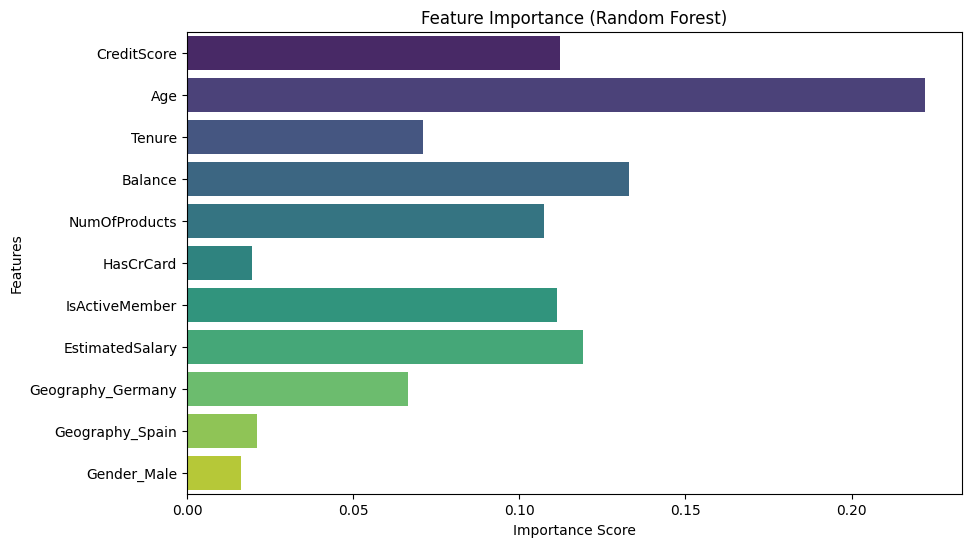

In [24]:
rf_importances = rf_best.feature_importances_
features = X.columns
plt.figure(figsize=(10, 6))
sns.barplot(x=rf_importances, y=features, palette='viridis')
plt.title('Feature Importance (Random Forest)')
plt.xlabel('Importance Score')
plt.ylabel('Features')
plt.show()